In [ ]:
import os
os.chdir('Completar con ruta absoluta del proyecto')
import models.layers as layers
import numpy as np
import matplotlib.pyplot as plt
from models.models import ConvolutionalNeuralNetwork
import models.activations as activations
import training.optimizers as optimizers
import training.losses as losses
import utils.metrics as metrics
# np.random.seed(21)

### CNN

In [2]:
import utils.dataset as dt

# Cargar dataset
x_train, y_train, x_test, y_test, x_val, y_val = dt.load_mnist(validation_size=0.2)

In [3]:
print(x_train.shape)
print(x_test.shape)
# print(x_val.shape)

(44800, 1, 28, 28)
(14000, 1, 28, 28)


In [ ]:
batch = 3200
x = x_train[:batch, :, :, :]
y = y_train[:batch]
c, h, w = x.shape[1:]
classes = y.shape[1]
epochs = 5
batch_size = 32

model = ConvolutionalNeuralNetwork(
    input_shape=(c, h, w),
    layers=[    
        layers.Conv2D(filters=32, filter_size=3, activation=activations.ReLU()),
        layers.MaxPool2D(pool_size=2),
        layers.Flatten(),
        layers.Dense(neurons=64, activation=activations.ReLU()),
        layers.Dense(neurons=classes, activation=activations.Softmax())
    ], 
    optimizer=optimizers.Adam(), 
    loss=losses.CategoricalCrossEntropy(reduction='mean'), 
    metrics=metrics.categorical_accuracy,
    verbose=True
)
model.summary()


In [ ]:
history = model.train(x, y, epochs=epochs, batch_size=batch_size)
train_loss = history['train']['loss']
train_acc = history['train']['categorical_accuracy']

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1mnon-precise type pyobject[0m
[0m[1mDuring: typing of argument at C:\Users\julip\Coding\Python Projects\neural-networks\models\models.py (175)[0m
[1m
File "models\models.py", line 175:[0m
[1m    def __init__(self, input_shape: tuple[int, ...], layers: list[Layer], optimizer: Optimizer, loss: Loss, metrics: Callable[[np.ndarray, np.ndarray], float], verbose: bool=False) -> None:
        <source elided>

[1m    @njit(parallel=True)
[0m    [1m^[0m[0m

[0m[1mDuring: Pass nopython_type_inference[0m 

This error may have been caused by the following argument(s):
- argument 0: [1mCannot determine Numba type of <class 'models.models.ConvolutionalNeuralNetwork'>[0m


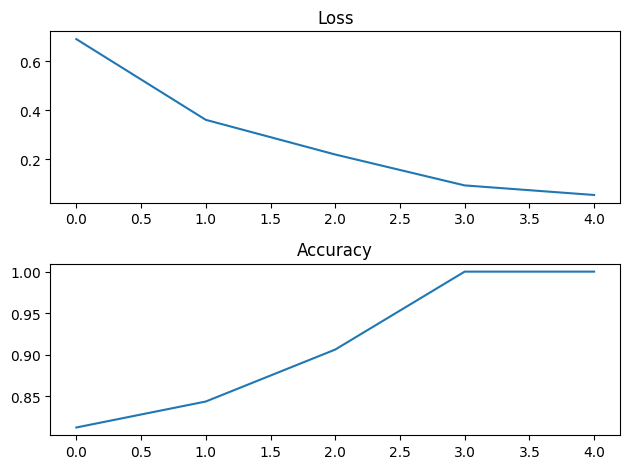

In [ ]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(train_loss)
ax[0].set_title('Loss')
ax[1].plot(train_acc)
ax[1].set_title('Accuracy')
plt.tight_layout()
plt.show()

In [ ]:
loss, acc = model.evaluate(x_test, y_test)
print(loss, acc)

0.18998207879120776 0.9445


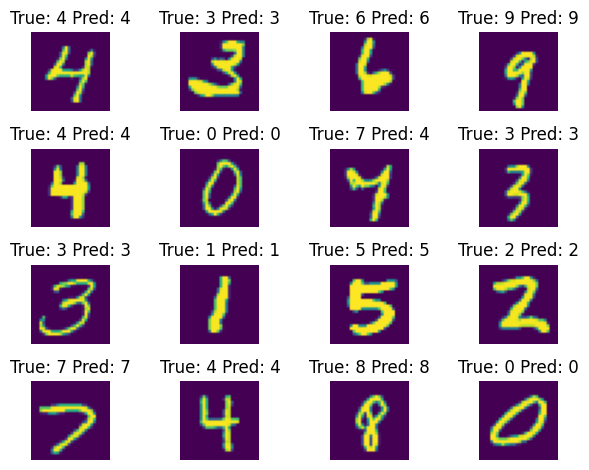

In [ ]:
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.axis('off')
    plt.imshow(x_test[i:i+1][0][0])
    plt.title(f"True: {str(np.argmax(y_test[i:i+1]))} Pred: {np.argmax(model(x_test[i:i+1]))}")
plt.tight_layout()